### 配合課程影片 hmwu_StatR-06.1
### Exercise 6.1

In [1]:
import pandas as pd
from math import ceil
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ttrc = pd.read_csv('./Data/stock_data.csv')

## 請檢查data資料表的相關資訊（dim,head）

In [3]:
ttrc.shape

(2312, 6)

In [4]:
ttrc.head(5)

,date,volume,open,high,low,close
0,2008/03/04,"75,215,589",60.1,63.0,60.1,62.9
1,2008/03/05,"70,208,395",63.5,63.5,62.5,63.3
2,2008/03/06,"64,665,074",63.5,64.9,63.5,64.9
3,2008/03/07,"53,049,638",63.6,64.5,63.3,64.0
4,2008/03/10,"59,861,047",62.9,62.9,61.0,61.2


## 請對data裡面的"Close"欄位計算移動平均（以20天為一區間）

In [5]:
sma = ttrc[0:100].close.rolling(window = 20).mean()

## 同時比較一下EMA,WMA的差異

In [6]:
ema = ttrc[0:100].close.ewm(span = 20, min_periods = 20).mean()

In [7]:
def wma_formula(data, window_size = 1):
    result = []
    length = (window_size + 1) * window_size/2
    for i in range(len(data)):
        if i < window_size:
            result.append('NaN')
        else:
            wmsum = 0
            for j in range(window_size):
                wmsum += data[i - j] * (window_size - j)/length
            result.append(wmsum)
    return pd.Series(result, dtype = float)

In [8]:
wma = wma_formula(ttrc[0:100].close, 20)

## 將各類移動平均畫在圖上。

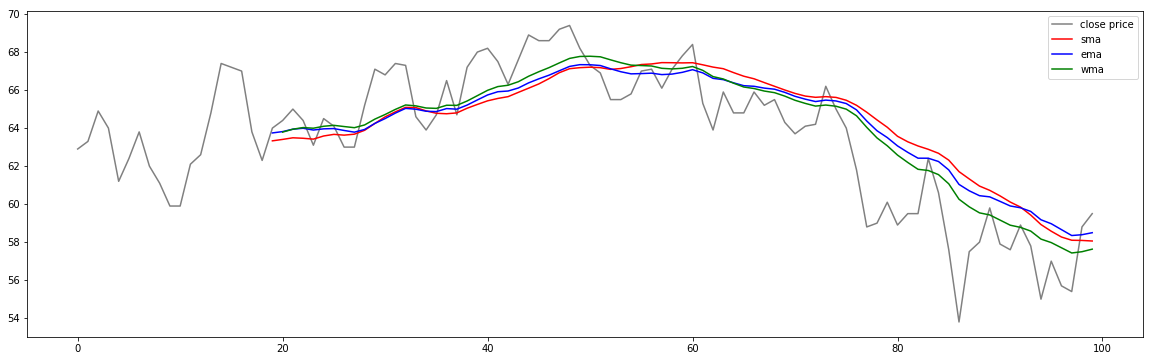

In [9]:
plt.figure(figsize = (20, 6))
plt.plot(ttrc[0:100].close, 'gray')
plt.plot(sma, 'r')
plt.plot(ema, 'b')
plt.plot(wma, 'g')
plt.legend(['close price', 'sma', 'ema', 'wma'])
plt.show()

In [10]:
cars = pd.read_csv('./Data/cars.csv', index_col = 0)

## 請檢查cars資料表的相關資訊（dim,head)

In [11]:
cars.shape

(50, 2)

In [12]:
cars.head()

,speed,dist
1,4,2
2,4,10
3,7,4
4,7,22
5,8,16


## lowess，試看看調整其中的參數f(區間視窗)，看看效果如何。

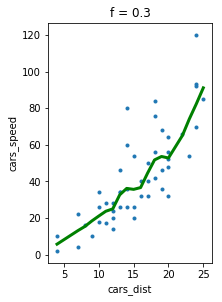

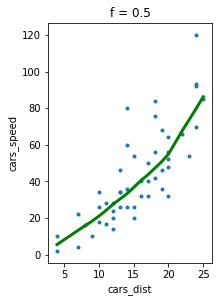

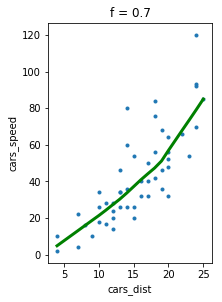

In [13]:
import statsmodels.api as sm

# R starts at 1, Python starts at 0, so we need to reset index
cars.reset_index(drop = True, inplace = True)

lowess = sm.nonparametric.lowess

# Have to change the coefficient because Python cannot draw graph with sharp edges
w = [0.3, 0.5, 0.7]

for i in range(1,4):
    plt.figure(figsize = (10, 15))
    plt.subplot(3, 3, i)
    Z = lowess(cars.dist, cars.speed, frac = w[i - 1], it = 2)
    plt.plot(Z[:, 0], Z[:, 1], 'g-', lw = 3)
    plt.scatter(cars.speed, cars.dist, marker = '.')
    plt.xlabel('cars_dist')
    plt.ylabel('cars_speed')
    plt.title('f = '+ str(w[i - 1]))
    plt.show()

## 請對iris資料集裡面的Sepal.Length欄位做smoothing

In [14]:
from sklearn import datasets
iris = datasets.load_iris()

In [15]:
X = iris.data[:, 0]

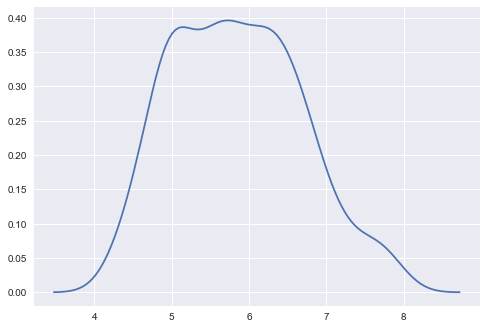

In [16]:
import seaborn as sns
sns.kdeplot(X, bw = 0.2736)

## 請將density裡的kernel改設定成用"rectangular"，同樣對Sepal.Length做smoothing，並將結果呈現於圖上觀察差異

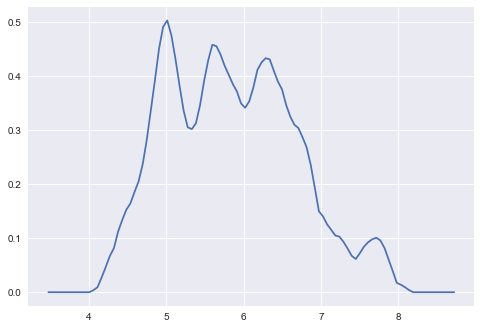

In [17]:
# Python does not support rectangular, the closest thing they have is cos
sns.kdeplot(X, bw = 0.2736, kernel = 'cos')

## 在圖上看看平滑前後的差異

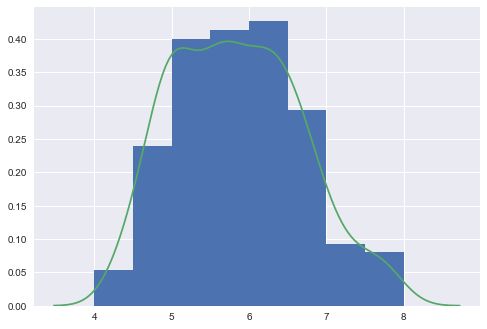

In [18]:
plt.hist(X, density = True, bins = [4, 4.5, 5, 5.5, 6, 6.5, 7, 7.5, 8], histtype = 'stepfilled')
sns.kdeplot(X, bw = 0.2736)

## 讀取檔案"ruddyduck"

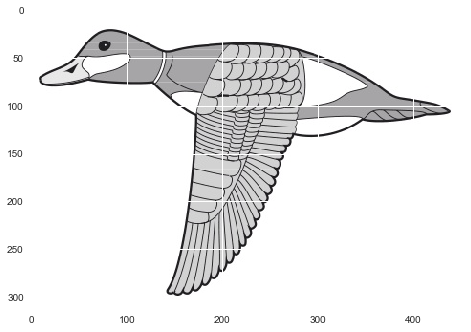

In [19]:
import cv2
img = cv2.imread('./Data/ruddyduck.jpg')
plt.imshow(img)

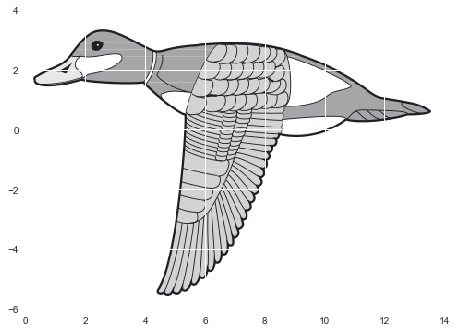

In [20]:
plt.grid(True)
plt.imshow(img, extent = (0, 14, -6, 4))

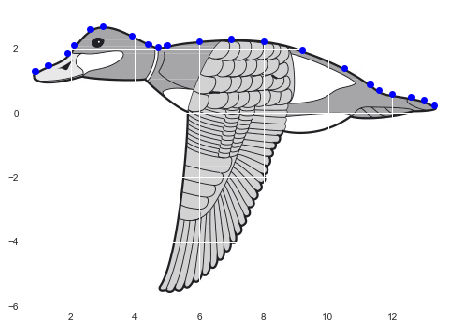

In [21]:
points = pd.read_csv('./Data/ruddyduck.txt', sep = '\t')
plt.grid(True)
plt.plot(points.x, points.fx, 'bo')
plt.imshow(img, extent = (0.6, 13.8, -6, 3.3))

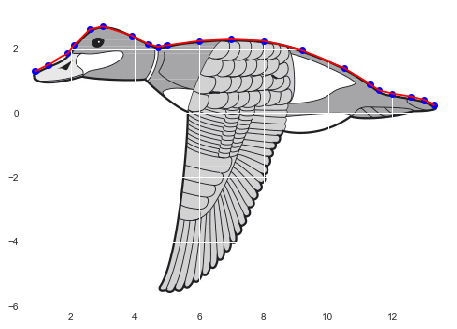

In [22]:
points = pd.read_csv('./Data/ruddyduck.txt', sep = '\t')
plt.grid(True)
plt.plot(points.x, points.fx, 'bo')
plt.plot(points.x, points.fx, 'r')
plt.imshow(img, extent = (0.6, 13.8, -6, 3.3))